We import the necessary libraries

In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle
from scipy import stats

In [59]:
data = pd.read_csv('real_state_spark.csv')
data.head()

,Localizacion,Precio,Cuartos,Baños,Cocheras,Area_total,Longitud,Latitud
0,San Miguel Totocuitlapilco,9600000.0,3.0,3.0,NaN,253.0,-99.591114,19.230067
1,"USD""",3.0,3.0,3.0,298.0,100.0,25.640729,NaN
2,Ojo de Agua,1543900.0,3.0,3.0,1.0,79.0,-97.525141,20.269082
3,10 de Abril,4600000.0,4.0,3.0,4.0,223.0,-109.163541,26.578685
4,Méx.,32000000.0,5.0,4.0,NaN,1154.0,-99.689972,19.483945


In [60]:
data.shape

(915, 8)

In [61]:
data[[ 'Precio', 'Cuartos', 'Baños', 'Cocheras', 'Longitud', 'Latitud']] = \
data[[ 'Precio', 'Cuartos', 'Baños', 'Cocheras', 'Longitud', 'Latitud']].fillna(0)

In [62]:
data[['Precio','Cuartos', 'Baños', 'Cocheras']] = \
data[['Precio','Cuartos', 'Baños', 'Cocheras']].astype('int')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Localizacion  915 non-null    object 
 1   Precio        915 non-null    int32  
 2   Cuartos       915 non-null    int32  
 3   Baños         915 non-null    int32  
 4   Cocheras      915 non-null    int32  
 5   Area_total    671 non-null    float64
 6   Longitud      915 non-null    float64
 7   Latitud       915 non-null    float64
dtypes: float64(3), int32(4), object(1)
memory usage: 43.0+ KB


In [64]:
data.describe()

,Precio,Cuartos,Baños,Cocheras,Area_total,Longitud,Latitud
count,9.150000e+02,915.000000,915.000000,915.000000,671.000000,915.000000,915.000000
mean,4.742288e+06,2.955191,2.368306,2.852459,453.403875,-84.802564,17.949463
std,8.493745e+06,0.849226,1.012440,32.862805,5800.811905,36.385654,8.340171
min,0.000000e+00,0.000000,0.000000,0.000000,30.000000,-116.999072,-37.814644
25%,1.044828e+06,2.000000,2.000000,1.000000,78.000000,-100.328117,19.011396
50%,2.400000e+06,3.000000,2.000000,1.000000,126.000000,-99.048728,19.554633
75%,5.945000e+06,3.000000,3.000000,2.000000,229.500000,-97.048586,20.653577
max,2.040000e+08,6.000000,4.000000,950.000000,150000.000000,120.723601,43.291845


In [65]:
data.columns

Index(['Localizacion', 'Precio', 'Cuartos', 'Baños', 'Cocheras', 'Area_total',
       'Longitud', 'Latitud'],
      dtype='object')

In [66]:
data.isnull().sum()

Localizacion      0
Precio            0
Cuartos           0
Baños             0
Cocheras          0
Area_total      244
Longitud          0
Latitud           0
dtype: int64

<AxesSubplot:>

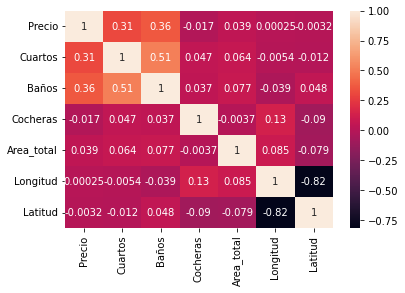

In [67]:
sns.heatmap(data.corr(), annot=True)

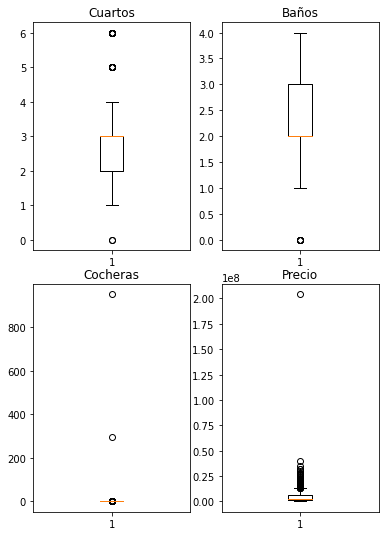

In [68]:
fig, axs = plt.subplots(2, 2, figsize=(6, 8))

axs[0,0].boxplot(data['Cuartos'])
axs[0,0].set_title('Cuartos')

axs[0,1].boxplot(data['Baños'])
axs[0,1].set_title('Baños')

axs[1,0].boxplot(data['Cocheras'])
axs[1,0].set_title('Cocheras')


axs[1,1].boxplot(data['Precio'])
axs[1,1].set_title('Precio')
 
 
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.05, top=0.9,
                    hspace=0.15, wspace=0.2)
                    
# show plot
plt.show()

In [69]:
data = data[(data['Precio'] < 100000000)]
data = data[(data['Cocheras'] < 20)]


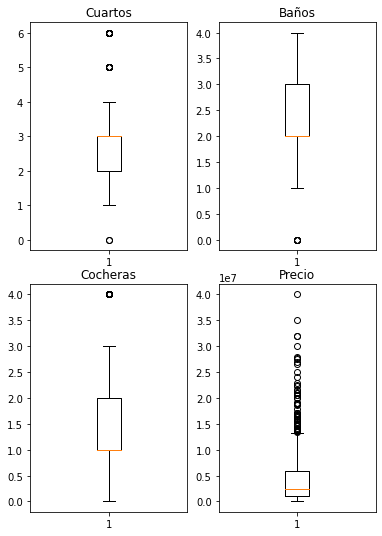

In [70]:
fig, axs = plt.subplots(2, 2, figsize=(6, 8))

axs[0,0].boxplot(data['Cuartos'])
axs[0,0].set_title('Cuartos')

axs[0,1].boxplot(data['Baños'])
axs[0,1].set_title('Baños')

axs[1,0].boxplot(data['Cocheras'])
axs[1,0].set_title('Cocheras')


axs[1,1].boxplot(data['Precio'])
axs[1,1].set_title('Precio')
 
 
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.05, top=0.9,
                    hspace=0.15, wspace=0.2)
                    
# show plot
plt.show()

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

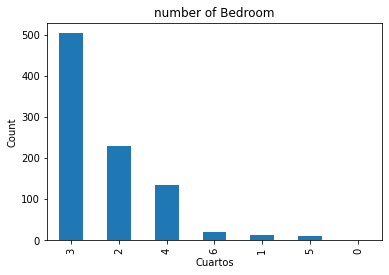

In [71]:
data['Cuartos'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Cuartos')
plt.ylabel('Count')
sns.despine

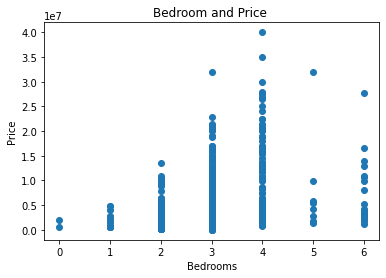

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [72]:
plt.scatter(data.Cuartos,data.Precio)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

In [73]:
dfA = data[data.Area_total.notnull()]
dfN = data[data.Area_total.isnull()]

In [74]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669 entries, 0 to 913
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Localizacion  669 non-null    object 
 1   Precio        669 non-null    int32  
 2   Cuartos       669 non-null    int32  
 3   Baños         669 non-null    int32  
 4   Cocheras      669 non-null    int32  
 5   Area_total    669 non-null    float64
 6   Longitud      669 non-null    float64
 7   Latitud       669 non-null    float64
dtypes: float64(3), int32(4), object(1)
memory usage: 36.6+ KB


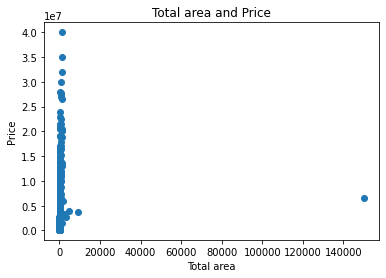

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [75]:
plt.scatter(dfA.Area_total,dfA.Precio)
plt.title("Total area and Price")
plt.xlabel("Total area")
plt.ylabel("Price")
plt.show()
sns.despine

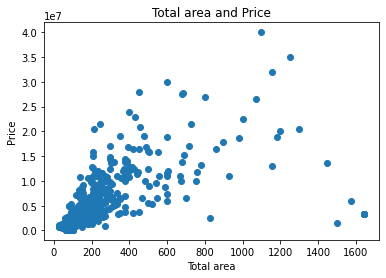

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [94]:
dfA = dfA[(dfA['Area_total'] < 2000)]
plt.scatter(dfA.Area_total,dfA.Precio)
plt.title("Total area and Price")
plt.xlabel("Total area")
plt.ylabel("Price")
plt.show()
sns.despine

(array([453., 124.,  40.,  14.,  13.,   4.,   5.,   4.,   1.,   7.]),
 array([  30. ,  191.2,  352.4,  513.6,  674.8,  836. ,  997.2, 1158.4,
        1319.6, 1480.8, 1642. ]),
 <BarContainer object of 10 artists>)

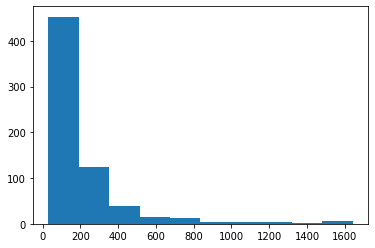

In [95]:
plt.hist(dfA['Area_total'])

In [96]:
X = dfA[['Precio','Cuartos', 'Baños', 'Cocheras']]
y = dfA['Area_total']

In [97]:
X_train, X_test,Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [98]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [99]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

          Coefficient
Precio       0.000025
Cuartos     12.480334
Baños       13.730200
Cocheras    23.291211


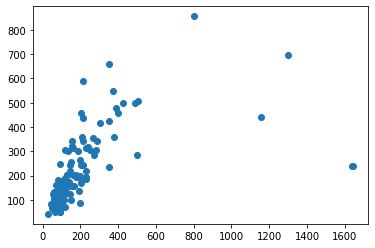

In [100]:
predictions = lr.predict(X_test)
plt.scatter(Y_test,predictions)

<AxesSubplot:xlabel='Area_total', ylabel='Count'>

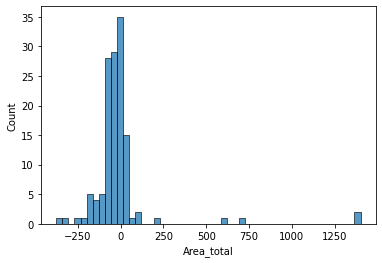

In [101]:
sns.histplot((Y_test-predictions), bins=50)

In [102]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 87.84911733237513
Mean Squared Error: 43160.34629644989
Root Mean Squared Error: 207.750683022824


In [104]:
dfN['Area_total'] = (dfN['Precio'] *  0.000025) + (dfN['Cuartos'] * 12.480334) + \
(dfN['Baños'] * 13.730200) + (dfN['Cocheras'] * 23.291211)


In [105]:
dfN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 9 to 914
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Localizacion  243 non-null    object 
 1   Precio        243 non-null    int32  
 2   Cuartos       243 non-null    int32  
 3   Baños         243 non-null    int32  
 4   Cocheras      243 non-null    int32  
 5   Area_total    243 non-null    float64
 6   Longitud      243 non-null    float64
 7   Latitud       243 non-null    float64
dtypes: float64(3), int32(4), object(1)
memory usage: 13.3+ KB


In [106]:
dfN.head()

,Localizacion,Precio,Cuartos,Baños,Cocheras,Area_total,Longitud,Latitud
9,Paseos del Bosque,15900000,4,4,4,595.506980,-100.445818,20.555883
10,Lomas de Tecamac,912590,3,1,1,97.277163,-98.995086,19.660755
15,Tecámac Centro,1794190,3,2,2,156.338574,-98.968354,19.711501
17,Hacienda de las Palmas,4199000,2,2,1,180.687279,-99.215892,0.000000
19,Hacienda de las Palmas,5000000,2,2,3,247.294701,0.000000,0.000000


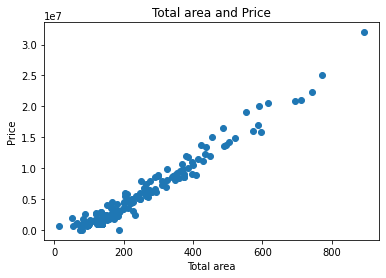

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [107]:
dfN = dfN[(dfN['Area_total'] < 20000)]
plt.scatter(dfN.Area_total,dfN.Precio)
plt.title("Total area and Price")
plt.xlabel("Total area")
plt.ylabel("Price")
plt.show()
sns.despine

(array([73., 77., 39., 19., 18.,  6.,  6.,  2.,  2.,  1.]),
 array([ 14.375    , 102.1736802, 189.9723604, 277.7710406, 365.5697208,
        453.368401 , 541.1670812, 628.9657614, 716.7644416, 804.5631218,
        892.361802 ]),
 <BarContainer object of 10 artists>)

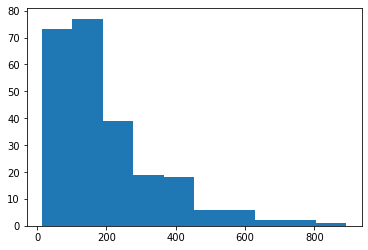

In [108]:
plt.hist(dfN['Area_total'])